In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
p = 0.52
n = 1497
respondents_yes = n*p
print(respondents_yes)

interval = stats.norm.interval(confidence=0.95,
                               loc=p,
                               scale=np.sqrt((p*(1-p))/n))
print(f"Interval calculated from scipy function: {interval}\n")

alpha = 0.05
z_score = stats.norm.ppf(1 - alpha/2)
print(f"Z score calculated from scipy = {z_score}")

SE = np.sqrt((p*(1-p))/n)
manual_interval = (p - z_score * SE,
                   p + z_score * SE)

print(f"Interval calculated manually: {manual_interval}\n")

778.44
Interval calculated from scipy function: (0.49469190352361486, 0.5453080964763851)

Z score calculated from scipy = 1.959963984540054
Interval calculated manually: (0.49469190352361486, 0.5453080964763851)



In [29]:
data = pd.read_csv("books.txt", delim_whitespace=True)
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8696\1967031486.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("books.txt", delim_whitespace=True)


,C,P
0,1,3
1,9,9
2,4,4
3,1,18
4,1,5


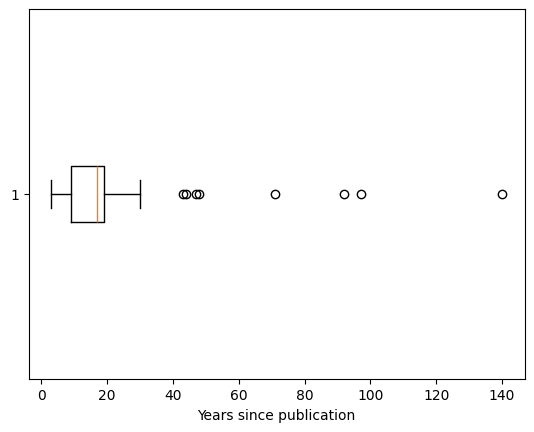

17.0


In [35]:
plt.boxplot(data["P"], vert=False)
plt.xlabel("Years since publication")
plt.show()
print(data["P"].median())

In [41]:
bootstrap_result = stats.bootstrap((data["P"],), lambda x: np.median(x), n_resamples=10_000)
bootstrap_result

BootstrapResult(confidence_interval=ConfidenceInterval(low=12.0, high=19.0), bootstrap_distribution=array([15., 17., 17., ..., 12., 17., 11.]), standard_error=2.2824326627276412)

In [4]:
n=100

n2 = 10_000
stds = np.zeros(n2)
stds2 = np.zeros(n2)
for i in range(n2):
    sample = stats.norm.rvs(size=n)
    stds[i] = sample.mean()
    stds2[i] = (np.quantile(sample, 0.25) + np.quantile(sample, 0.75)) / 2

# It turns out that sample mean is a bit better estimator
print(stds.std())
print(stds2.std())

print("Sample mean is better estimator") if stds.std() < stds2.std() else "Quantile mean is better estimator"

SE = 1 / np.sqrt(n)
print(f"Theoretical SE = {SE}")

0.09846190296801345
0.1086490250194969
Sample mean is better estimator
Theoretical SE = 0.1


For a sequence of observations of a binary random variable, you observe the geometric random variable outcome of the first success on observation y=3, Find and plot the likelihood function.

f(y) = (1-p)**y-1 * p

P(Y=y|p) = p(Y=3|p) = (1-p)**2 * p

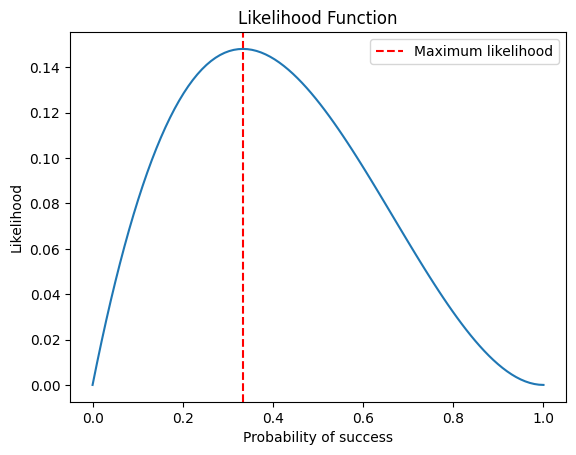

In [19]:
def likelihood(x):
    return (1-x)**2 * x

x = np.linspace(0., 1., 100)
y = likelihood(x)

# Maximum
plt.axvline(x=1/3, color='red', linestyle='--', label="Maximum likelihood")

plt.plot(x, y)
plt.title("Likelihood Function")
plt.xlabel("Probability of success")
plt.ylabel("Likelihood")
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10624\1553834802.py:3: RuntimeWarning: divide by zero encountered in log
  L2 = np.log(L)


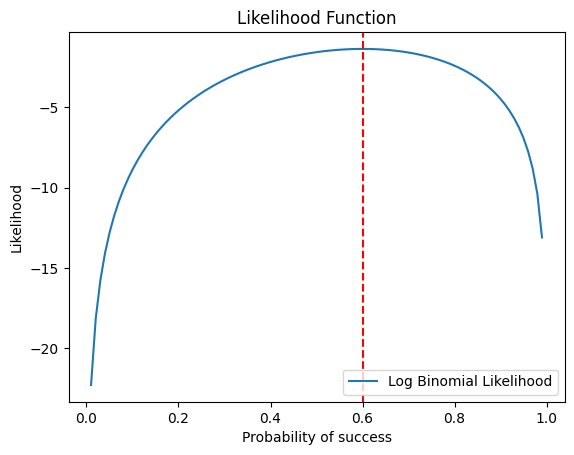

In [20]:

pi = np.linspace(0, 1, 100)
L = (stats.binom.pmf(6, 10, pi))
L2 = np.log(L)

plt.plot(pi, L2, label="Log Binomial Likelihood")
plt.title("Likelihood Function")
plt.xlabel("Probability of success")
plt.ylabel("Likelihood")
plt.legend()

# Maximum
plt.axvline(x=0.6, color='red', linestyle='--', label="Maximum log likelihood")

plt.show()

In [21]:
student_data = pd.read_csv("students.txt", delim_whitespace=True)
student_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10624\2213316495.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  student_data = pd.read_csv("students.txt", delim_whitespace=True)


,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


In [22]:
life_after_death = student_data["life"]
life_after_death.value_counts()

life
1    31
3    16
2    13
Name: count, dtype: int64

In [30]:
# 1 - yes
# 2 - no
# 3 - undecided
proportion = len(life_after_death[life_after_death==1]) / len(life_after_death)
print(f"Proportion = {proportion}")

p_hat = proportion
n = len(life_after_death)
interval = stats.wald.interval(confidence=0.95,
                               loc=p_hat,
                               scale=np.sqrt((p_hat*(1-p_hat))/n))
interval

Proportion = 0.5166666666666667


(0.5263311204343721, 0.7600024604092553)

In [29]:
p_hat = 938/1447
interval = stats.wald.interval(confidence=0.95,
                               loc=p_hat,
                               scale=np.sqrt((p_hat*(1-p_hat))/n))
interval

(0.6574728097258847, 0.880762480184083)

In [35]:
n = 25
p = 0.000001
alpha = 0.01
z_score = stats.norm.ppf(1-alpha/2)
interval = (-z_score*np.sqrt((p*(1-p))/n),
            z_score*np.sqrt((p*(1-p))/n))
interval

(-0.0005151656031267853, 0.0005151656031267853)

In [2]:
(0.5*0.5*1.96*1.96) / 0.05**2

384.1599999999999

In [13]:
p = 0.3
alpha = 0.1
error = 0.04
z_score = stats.norm.ppf(1 - alpha/2)
print(f"Z_score = {z_score}")
n = (p*(1-p)*(z_score**2)) / (error**2)
print(f"Required size = {np.ceil(n)}")

Z_score = 1.6448536269514722
Required size = 356.0


In [15]:
chicago_data = pd.read_csv("chicago.txt", delim_whitespace=True)
chicago_data = chicago_data.set_index("household")
chicago_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13056\1461131677.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  chicago_data = pd.read_csv("chicago.txt", delim_whitespace=True)


,income
household,
1,18.3
2,19.0
3,17.7
4,24.0
5,18.3


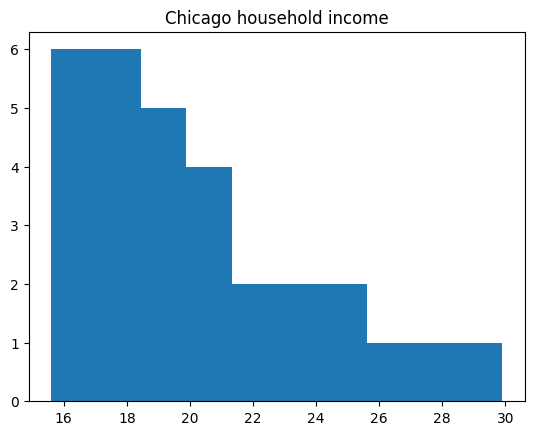

Mean = 20.33333333333333
Std = 3.681110527088758


In [24]:
size = len(chicago_data)
sample_mean = chicago_data["income"].mean()
sample_std = chicago_data["income"].std()

plt.hist(chicago_data["income"], bins=10)
plt.title("Chicago household income")
plt.show()

print(f"Mean = {sample_mean}\nStd = {sample_std}")

In [26]:
interval = stats.t.interval(confidence=0.95,
                            df=size-1,
                            loc=sample_mean,
                            scale=sample_std/np.sqrt(size))
print((interval[1] - interval[0]) / 2)
print(interval)

1.3745492608997871
(18.95878407243354, 21.707882594233116)


In [30]:
20.33 - 3.68 / (np.sqrt(30)) * 2.045, 20.33 + 3.68 / (np.sqrt(30)) * 2.045

(18.956019707079705, 21.703980292920292)

In [14]:
hours = np.array([0,0,1,1,1,2,2,3,3,4])
sample_mean = hours.mean()
sample_std = hours.std()
df = len(hours) - 1
interval = stats.t.interval(0.95,
                            df=df,
                            loc=sample_mean,
                            scale=sample_std/np.sqrt(len(hours)))
interval

(0.792313842927089, 2.607686157072911)

In [15]:
hours = np.array([0,0,1,1,1,2,2,3,3,24])
sample_mean = hours.mean()
sample_std = hours.std()

interval = stats.t.interval(0.95,
                            df=df,
                            loc=sample_mean,
                            scale=sample_std/np.sqrt(len(hours)))
interval = list(interval)
interval[0] = 0 if interval[0] < 0 else interval[0]
interval

[0, 8.594316999629807]

So we can see that confidence intervals are pretty sensitive to outliers, when sample size is really small.

In [16]:
income_data = pd.read_csv("income.txt",
                          delim_whitespace=True)
income_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6400\1868831864.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  income_data = pd.read_csv("income.txt",


,income,education,race
0,16,10,B
1,18,7,B
2,26,9,B
3,16,11,B
4,34,14,B


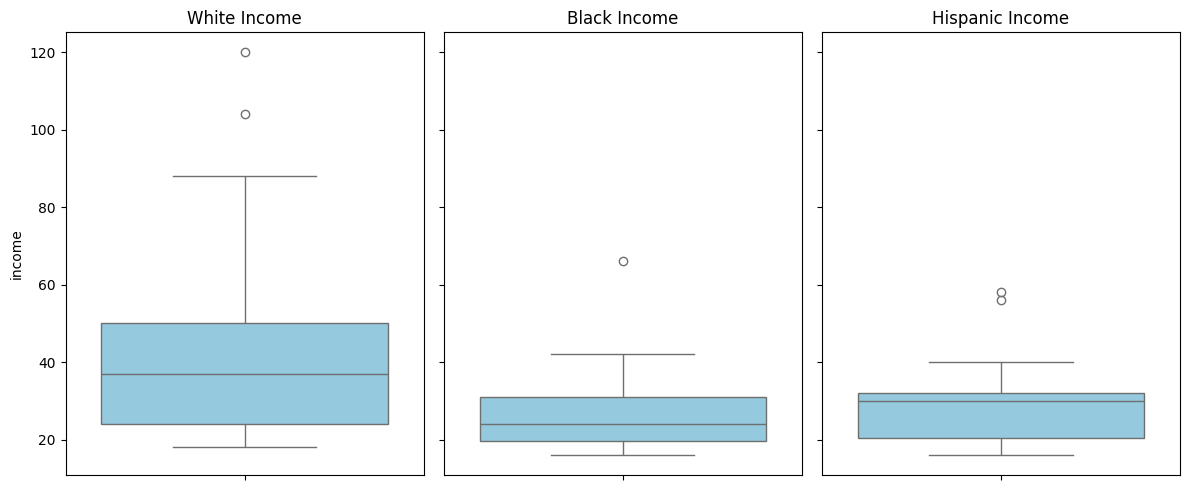

In [24]:
import seaborn as sns

black = income_data[income_data["race"]=="B"]["income"]
hispanic = income_data[income_data["race"]=="H"]["income"]
white = income_data[income_data["race"]=="W"]["income"]

races = [white, black, hispanic]
labels=["White", "Black", "Hispanic"]

fig, axes = plt.subplots(figsize=(12, 5), ncols=3, sharey=True)

for ax, race_data, label in zip(axes, races, labels):
    sns.boxplot(data=race_data, ax=ax, color='skyblue')
    ax.set_title(f"{label} Income")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [37]:
white.var(), black.var()

(523.0302040816327, 176.46666666666667)

In [36]:
alpha = 0.1
df = len(white) + len(black) - 2

# Confidence interval between the population mean income of black and whites
mean = abs(white.mean() - black.mean())
S = np.sqrt((np.sum((white - white.mean()) ** 2) + np.sum((black - black.mean()) ** 2))/df)
SE = S * np.sqrt(1/len(white)+1/len(black))

interval = stats.t.interval(confidence=1-alpha,
                            df=df,
                            loc=mean,
                            scale=SE)
interval

(4.653685682028026, 24.806314317971967)

In [39]:
anorexia_data = pd.read_csv("anorexia.txt", delim_whitespace=True)
anorexia_data_f = anorexia_data[anorexia_data["therapy"]=="f"]
anorexia_data_f.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6400\787727941.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  anorexia_data = pd.read_csv("anorexia.txt", delim_whitespace=True)


,subject,therapy,before,after
29,30,f,83.8,95.2
30,31,f,83.3,94.3
31,32,f,86.0,91.5
32,33,f,82.5,91.9
33,34,f,86.7,100.3


17


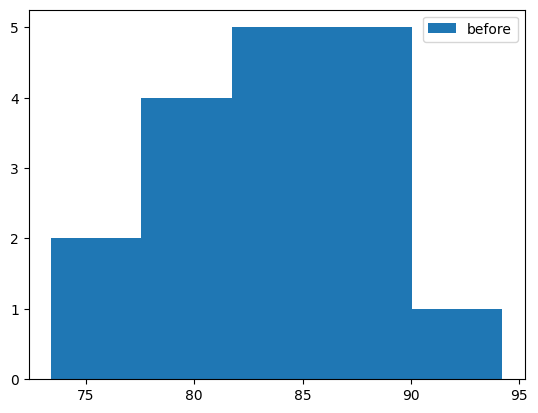

In [46]:
print(len(anorexia_data_f))

plt.hist(anorexia_data_f["before"], bins=5, label="before")
plt.legend()
plt.show()

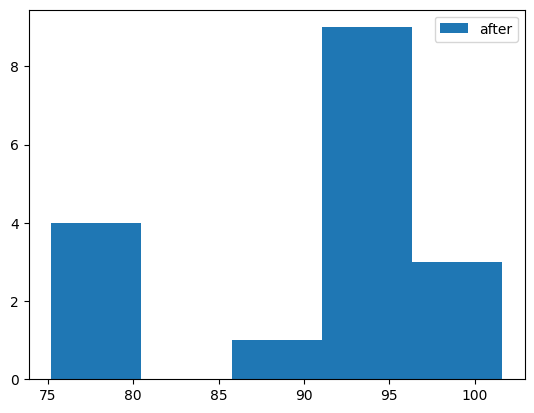

In [47]:
plt.hist(anorexia_data_f["after"], bins=5, label="after")
plt.legend()
plt.show()

In [59]:
anorexia_data_f

,subject,therapy,before,after
29,30,f,83.8,95.2
30,31,f,83.3,94.3
31,32,f,86.0,91.5
32,33,f,82.5,91.9
33,34,f,86.7,100.3
34,35,f,79.6,76.7
35,36,f,76.9,76.8
36,37,f,94.2,101.6
37,38,f,73.4,94.9
38,39,f,80.5,75.2


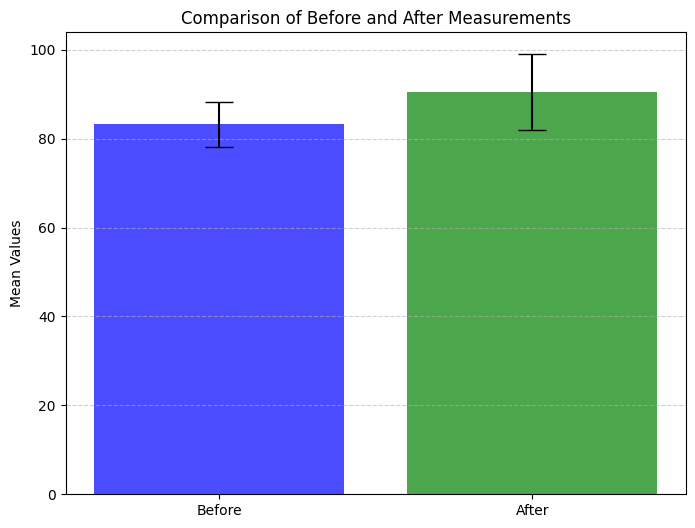

In [49]:
before_mean = anorexia_data_f["before"].mean()
before_std = anorexia_data_f["before"].std()
after_mean = anorexia_data_f["after"].mean()
after_std = anorexia_data_f["after"].std()

categories = ['Before', 'After']
means = [before_mean, after_mean]
std_devs = [before_std, after_std]

plt.figure(figsize=(8, 6))
plt.bar(categories, means, yerr=std_devs, capsize=10, color=['blue', 'green'], alpha=0.7)

plt.ylabel('Mean Values')
plt.title('Comparison of Before and After Measurements')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [63]:
differences = anorexia_data_f["after"] - anorexia_data["before"]
print(differences.mean(), differences.std())

SE = differences.std() / np.sqrt(17)
print(SE)

interval = stats.t.interval(0.95,
                            16,
                            loc=differences.mean(),
                            scale=SE)
interval

7.264705882352942 7.15742107679772
1.7359295945093585


(3.5846995358779727, 10.94471222882791)

In [75]:
family_therapy_group = anorexia_data[anorexia_data["therapy"]=="f"]
control_group = anorexia_data[anorexia_data["therapy"]=="c"]

df = len(family_therapy_group) + len(control_group) - 2
print(df)
family_therapy_group_diff = family_therapy_group["before"] - family_therapy_group["after"]
control_group_diff = control_group["before"] - control_group["after"]

family_mean, family_std = family_therapy_group_diff.mean(), family_therapy_group_diff.std()
control_mean, control_std = control_group_diff.mean(), control_group_diff.std()
print(f"Means = {family_mean}, {control_mean}")

n1 = len(family_therapy_group)
n2 = len(control_group)
S = np.sqrt(((n1-1)*family_std**2 + (n2-1)*control_std**2)/df)
SE = S * np.sqrt(1/n1 + 1/n2)
print(SE)

mean = (control_mean-family_mean)
interval = stats.t.interval(0.95,
                            df,
                            mean,
                            SE)
interval

41
Means = -7.264705882352942, 0.449999999999999
2.393881585166895


(2.880163942723251, 12.549247821982632)

This means that on average family and control groups mean weight changes differs from 3 to about 12, for + for control group

In [3]:
student_data = pd.read_csv("students.txt", delim_whitespace=True)
student_tv = student_data["tv"]
student_tv = student_tv.dropna()
student_tv.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6972\3849382577.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  student_data = pd.read_csv("students.txt", delim_whitespace=True)


0     3.0
1    15.0
2     0.0
3     5.0
4     6.0
Name: tv, dtype: float64

In [4]:
tv_interval = stats.t.interval(0.95,
                               len(student_tv)-1,
                               student_tv.mean(),
                               student_tv.std()/np.sqrt(len(student_tv)))
tv_interval

(5.531394851400217, 9.001938481933117)

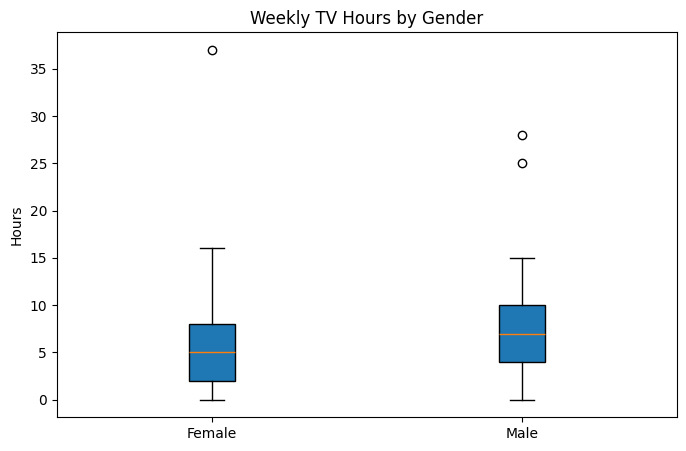

(6.5, 7.983870967741935, -0.8530983069283323, 0.3971141870196562)

In [11]:
student_female = student_data[student_data["gender"]==0]["tv"]
student_male = student_data[student_data["gender"]==1]["tv"]
mean_female = student_female.mean()
mean_male = student_male.mean()

t_stat, p_value = stats.ttest_ind(student_female, student_male)

plt.figure(figsize=(8, 5))
plt.boxplot([student_female, student_male], labels=["Female", "Male"], patch_artist=True)
plt.title("Weekly TV Hours by Gender")
plt.ylabel("Hours")
plt.show()

mean_female, mean_male, t_stat, p_value

In [14]:
female_p = 1017/1178
male_p = 703/945

def v_sample_std(p, n):
    return np.sqrt((p*(1-p))/n)

interval_female = stats.norm.interval(confidence=0.95,
                                      loc=female_p,
                                      scale=v_sample_std(female_p, 1178))
print(f"Female = {interval_female}")
interval_male = stats.norm.interval(confidence=0.95,
                                    loc=male_p,
                                    scale=v_sample_std(male_p, 945))
print(f"Male = {interval_male}")

Female = (0.8437119849100622, 0.882943363137476)
Male = (0.7160871049691199, 0.7717435828615679)


In [20]:
difference_scale = np.sqrt(female_p*(1-female_p)/1178 + male_p*(1-male_p)/945)
print(difference_scale)
interval_difference = stats.norm.interval(confidence=0.95,
                                          loc=female_p-male_p,
                                          scale=difference_scale)
print(f"Difference = {interval_difference}")

0.017371147154186403
Difference = (0.08536550731607442, 0.15345915290077602)


In [19]:
np.sqrt(female_p*(1-female_p)/1178 + male_p*(1-male_p)/945)

0.017371147154186403

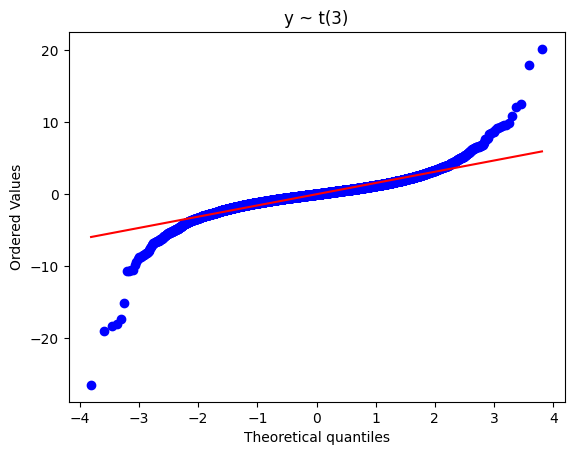

In [25]:
import pylab 
n=10_000
df=3
data = stats.t.rvs(df=3,
                   size=n)
stats.probplot(data, dist="norm", plot=plt)
plt.title("y ~ t(3)")
plt.gca().get_lines()[1].set_color('red') 
plt.show()

In [27]:
library = pd.read_csv("library.txt",
                      delim_whitespace=True)
library = library["C"]
library.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6972\766072814.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  library = pd.read_csv("library.txt",


0    1
1    9
2    4
3    1
4    1
Name: C, dtype: int64

In [33]:
interval_median = stats.bootstrap(data=(library,),
                                  statistic=np.median,
                                  n_resamples=10_000,
                                  confidence_level=0.95)
interval_median

BootstrapResult(confidence_interval=ConfidenceInterval(low=2.0, high=5.0), bootstrap_distribution=array([5., 5., 3., ..., 5., 4., 5.]), standard_error=0.9016578556685837)

BootstrapResult(confidence_interval=ConfidenceInterval(low=2.0, high=5.0), bootstrap_distribution=array([5., 4., 6., ..., 4., 4., 2.]), standard_error=0.8883713358517575)

In [35]:
interval_std = stats.bootstrap(data=(library,),
                                statistic=np.std,
                                n_resamples=10_000,
                                confidence_level=0.95)
interval_std

BootstrapResult(confidence_interval=ConfidenceInterval(low=9.927906479299791, high=22.20532408482847), bootstrap_distribution=array([15.39601831, 11.11562584, 13.28275085, ..., 10.03645899,
       17.0109382 , 12.30550358]), standard_error=3.1500909679068148)

In [42]:
from scipy.stats import cauchy

data = cauchy.rvs(size=1000)

def trimmed_mean(x, proportion=0.05):
    return stats.trim_mean(x, proportion)

interval_trimmed_mean = stats.bootstrap(data=(data,),
                                        statistic=trimmed_mean,
                                        n_resamples=10_000,
                                        confidence_level=0.95)
print(interval_trimmed_mean)
ordinary_interval = stats.norm.interval(0.95,0,0)
print(ordinary_interval)

BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.10825862631252212, high=0.25635579568208433), bootstrap_distribution=array([-0.03614327,  0.08841749,  0.0627728 , ..., -0.03456621,
        0.20796259,  0.14835533]), standard_error=0.09298432499881129)
(nan, nan)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
